**Datasets**

* https://genius.com/albums/Game-of-thrones/Season-1-scripts
* https://www.kaggle.com/albenft/game-of-thrones-script-all-seasons?select=Game_of_Thrones_Script.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Game_of_Thrones_Script.csv')

df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [3]:
df.Name.value_counts()

tyrion lannister           1760
jon snow                   1133
daenerys targaryen         1048
cersei lannister           1005
jaime lannister             945
                           ... 
wildling elder                1
harpy                         1
buer                          1
knight of house bracken       1
cold                          1
Name: Name, Length: 564, dtype: int64

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ben/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english')) 
ignore_lemmatizer = set(['us'])
porter=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(t):
    return t if t in ignore_lemmatizer else wordnet_lemmatizer.lemmatize(t)

def process_sentence(s):
    s = s.lower()
    #tokens = re.sub(r'[^a-z]', ' ', s).split()
    #tokens = [lemmatize(t) for t in tokens if t not in stop_words]
    tokens = nltk.word_tokenize(s)
    tags = nltk.pos_tag(tokens)
    tokens = [lemmatize(t) for t,pos in tags if pos == 'NN' and t not in stop_words]
    return tokens

In [6]:
df.Sentence = df.Sentence.apply(process_sentence)

In [7]:
names = ['jon snow', 'daenerys targaryen', 'cersei lannister']

In [8]:
df1 = df[df.Name.isin(names)]

In [9]:
from collections import Counter

In [10]:
character_words = {}
for name in names:
    sents = df1[df1.Name==name].Sentence
    words = [w for sent in sents.values for w in sent]
    counts = Counter(words)
    character_words[name] = pd.Series(counts).rename(name)

In [11]:
all_words = [w for sent in df1.Sentence.values for w in sent]
all_counts = Counter(all_words)
total = pd.Series(all_counts).rename('total')

In [12]:
df_words = pd.concat([total] + list(character_words.values()), axis=1).sort_values('total', ascending=False).fillna(0)
df_words.head(5)

,total,jon snow,daenerys targaryen,cersei lannister
father,111,40.0,20.0,51.0
king,106,34.0,21.0,51.0
man,89,23.0,33.0,33.0
brother,80,18.0,25.0,37.0
queen,64,13.0,26.0,25.0


In [13]:
for c in names:
    df_words[c] /= df_words.total

In [14]:
df_words.head(5)

,total,jon snow,daenerys targaryen,cersei lannister
father,111,0.360360,0.180180,0.459459
king,106,0.320755,0.198113,0.481132
man,89,0.258427,0.370787,0.370787
brother,80,0.225000,0.312500,0.462500
queen,64,0.203125,0.406250,0.390625


In [47]:
df_words = df_words[df_words.total >= 3]

In [48]:
import random
import math
def jitter(x,y,z, jit=0.05):
    def jitme(k):
        return max(0, min(1, k+random.random()*jit))
    def norm(v):
        sum_v = sum([vi for vi in v])
        return [(vi/sum_v) for vi in v]
    return norm([jitme(x), jitme(y), jitme(z)])

In [49]:
points = df_words.apply(lambda r: jitter(*list([r[name] for name in names])), axis=1)

In [50]:
selected_words_jon = df_words[df_words['jon snow']>.7].sort_values('total', ascending=False).head(5).index.values
selected_words_daenerys = df_words[df_words['daenerys targaryen']>.7].sort_values('total', ascending=False).head(5).index.values
selected_words_cersei = df_words[df_words['cersei lannister']>.7].sort_values('total', ascending=False).head(5).index.values

selected_words_jon_daenerys = df_words[(df_words['jon snow']>.4) & (df_words['daenerys targaryen']>.4)].sort_values('total', ascending=False).head(3).index.values
selected_words_jon_cersei = df_words[(df_words['jon snow']>.4) & (df_words['cersei lannister']>.4)].sort_values('total', ascending=False).head(3).index.values
selected_words_cersei_daenerys = df_words[(df_words['cersei lannister']>.4) & (df_words['daenerys targaryen']>.4)].sort_values('total', ascending=False).head(3).index.values

selected_words_all_three = df_words[(df_words['jon snow']>.25) &
                                     (df_words['daenerys targaryen']>.25) &
                                     (df_words['cersei lannister']>.25)
                                    ].sort_values('total', ascending=False).head(3).index.values
#selected_words_all_three = df_words.sort_values('total', ascending=False).head(5).index.values

In [57]:
selected_words = [[selected_words_jon, 'tab:blue', 'blue'],
 [selected_words_daenerys, 'tab:red', 'darkred'],
 [selected_words_cersei, 'gold', 'saddlebrown'],
 [selected_words_jon_daenerys, 'lightpink', 'purple'],
 [selected_words_jon_cersei, 'tab:brown', 'darkred'],
 [selected_words_cersei_daenerys, 'wheat', 'tab:orange'],
 [selected_words_all_three, 'dimgray', 'black']
]

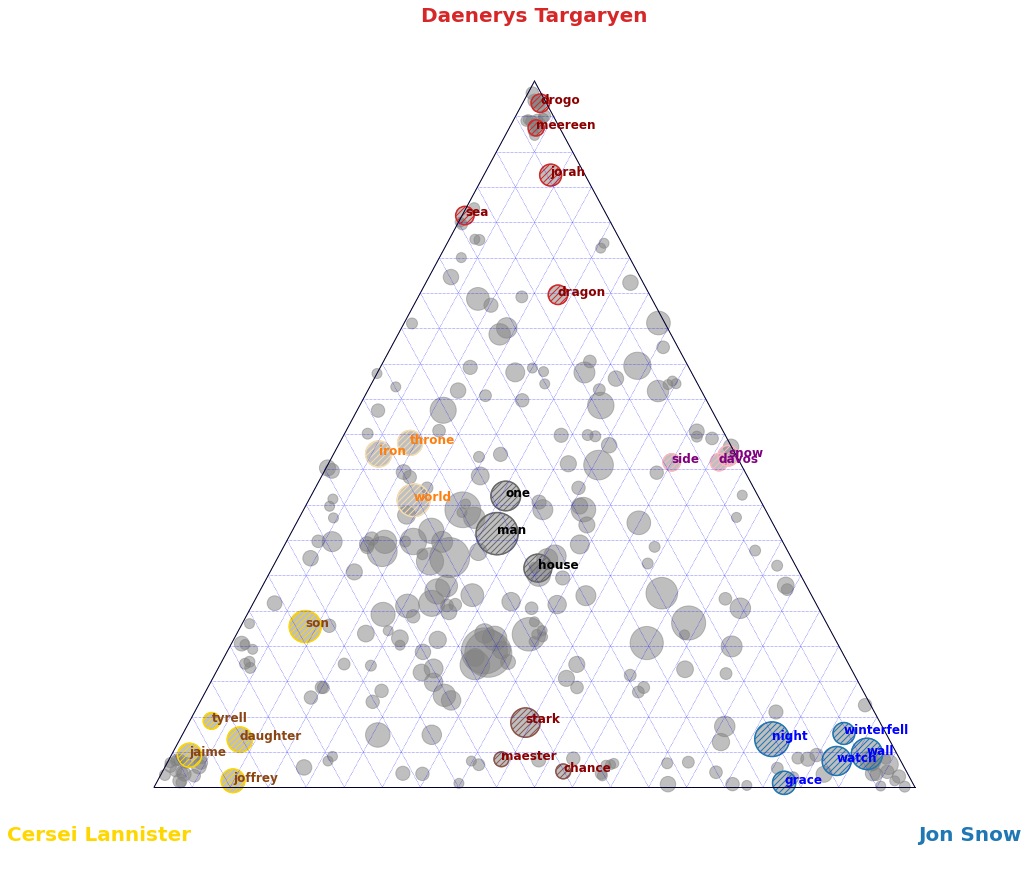

In [67]:
import ternary

### Scatter Plot
plt.figure(figsize=(15,15))
scale = 1
figure, tax = ternary.figure(scale=scale, ax=plt.gca())
#tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=1.0)
tax.gridlines(multiple=.05, color="blue")
# Plot a few different styles with a legend
#points = random_points(30, scale=scale)
#tax.scatter(points, marker='s', color='red', label="Red Squares")
#points = random_points(30, scale=scale)
#tax.scatter(points, marker='D', color='green', label="Green Diamonds")
tax.scatter(points, marker='o', color='gray', s=df_words.total*20, alpha=0.5)

for words, color, text_color in selected_words:
    sizes = [df_words.total[w]*20 for w in words]
    tax.scatter([points[w] for w in words],
                marker='o', color=color, facecolor='none', lw=1.5,
                s=sizes, hatch='////')
    for w in words:
        tax.annotate(w, points[w], fontsize=12, fontweight='bold', color=text_color)
    
fontsize=20
tax.right_corner_label("Jon Snow", fontsize=fontsize, fontweight='bold', color='tab:blue')
tax.top_corner_label("Daenerys Targaryen", fontsize=fontsize, fontweight='bold', color='tab:red')
tax.left_corner_label("Cersei Lannister", fontsize=fontsize, fontweight='bold', color='gold')

#tax.legend()
#tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.get_axes().axis('off')

tax.show()
figure.savefig('ternary_plot.png')